In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def prepare(filepath): 
    IMG_SIZE = 28 
    img_array = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    img_changes = []
    
    #Make mask of the transparent bits
    mask = img_array[:,:,3] == 0
    img_changes.append(img_array)
    
    #change the mask bits to black
    #img_array[mask] = [0, 0, 0, 0]
    #img_changes.append(img_array)
    
    #make new image
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGRA2GRAY)
    img_changes.append(img_array)
    
    img_array = cv2.GaussianBlur(img_array, (5, 5), 0)
    ret,img_array = cv2.threshold(img_array,125,255,0)
    img_changes.append(img_array)

    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img_changes.append(new_array)
    
    #diplaying images
    fig=plt.figure(figsize=(10, 10))
    for i in range(len(img_changes)):
        fig.add_subplot(1, 5, i+1)
        plt.imshow(img_changes[i])
    plt.show()
        
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

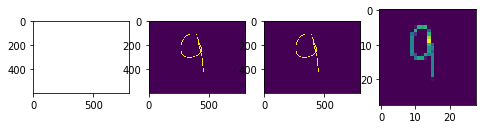

1/1 [==============================] - 0s 80ms/sample
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
model = tf.keras.models.load_model("cnn.model")
newImage = prepare('pic.png')
prediction = model.predict(newImage, verbose = 1) 
print(prediction)